In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Importing data

In [2]:
data_image_size = [256, 256]

train_data = 'dataset_256X256/train'
test_data = 'dataset_256X256/test'

Applied DL CNN Classifier : a nerual network named Resonet50 architecture

In [3]:
# ResNet50 library with preprocessing layer, initialized ResNet50
#concatenation of 3 meaning 3 channels of RGB
#instead of all categories, we use only 4, so used False here
resnet = ResNet50(input_shape = data_image_size + [3], weights = 'imagenet', include_top=False)

imagenet dataset has millions of images of thousands of categories, this model will help to classify the image our model properly

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('dataset_256X256/train/*')

In [7]:
folders

['dataset_256X256/train\\berry',
 'dataset_256X256/train\\bird',
 'dataset_256X256/train\\dog',
 'dataset_256X256/train\\flower']

In [8]:
layer = Flatten()(resnet.output)

In [9]:
#input is the resnet input, and output is the prediction with 4 nodes and activation function is softmax

prediction = Dense(len(folders), activation='softmax')(layer)

model = Model(inputs=resnet.input, outputs=prediction)

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [11]:
#telling the model to use cost & optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

Data augmentation has been used to be able to create own images, from a variation of images I create more images. Uses 'image data generator'
Augmetions are mainly scaling, zooming, flipping, hor-ver flipping

In [12]:
#image data generator to import images from dataset
#in test data, we do not need to do data augmentation
#rescaling is used to make images come in 0 to 1 (fast) range of different pixels
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_DataGenerator=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
            
Test_DataGenerator=ImageDataGenerator(rescale=1./255)

In [13]:
#same target image size is needed
training_dataset = Train_DataGenerator.flow_from_directory('dataset_256X256/train',
                                                       target_size=(256,256),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 4800 images belonging to 4 classes.


In [14]:
testing_dataset = Test_DataGenerator.flow_from_directory('dataset_256X256/test',
                                                       target_size=(256,256),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 1600 images belonging to 4 classes.


In [ ]:
#fitting the model
a2_model = model.fit_generator(
         training_dataset,
         validation_data=testing_dataset,
         epochs=25,
         steps_per_epoch=len(training_dataset),
         validation_steps=len(testing_dataset))

C:\Users\HP\AppData\Local\Temp\ipykernel_20820\2971446564.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a2_model = model.fit_generator(


Epoch 1/25
150/150 [==============================] - 621s 4s/step - loss: 3.1946 - accuracy: 0.3906 - val_loss: 2.2545 - val_accuracy: 0.4169
Epoch 2/25
150/150 [==============================] - 596s 4s/step - loss: 1.8499 - accuracy: 0.4452 - val_loss: 1.4180 - val_accuracy: 0.4806
Epoch 3/25
150/150 [==============================] - 540s 4s/step - loss: 1.6911 - accuracy: 0.4848 - val_loss: 1.4903 - val_accuracy: 0.5544
Epoch 4/25
150/150 [==============================] - 506s 3s/step - loss: 1.8226 - accuracy: 0.4865 - val_loss: 1.2740 - val_accuracy: 0.5337
Epoch 5/25
150/150 [==============================] - 530s 4s/step - loss: 1.4877 - accuracy: 0.5367 - val_loss: 1.3855 - val_accuracy: 0.5319
Epoch 6/25
150/150 [==============================] - 541s 4s/step - loss: 1.4995 - accuracy: 0.5219 - val_loss: 1.2762 - val_accuracy: 0.5794
Epoch 7/25
150/150 [==============================] - 617s 4s/step - loss: 1.5740 - accuracy: 0.5444 - val_loss: 1.0159 - val_accuracy: 0.6394

In [20]:
a2_model.history

{'loss': [1.609070062637329,
  1.5472172498703003,
  1.59012770652771,
  1.3705699443817139,
  1.5795650482177734,
  1.3921059370040894,
  1.4570685625076294,
  1.4043256044387817,
  1.5503861904144287,
  1.4690927267074585,
  1.093981146812439,
  1.3148691654205322,
  1.3212637901306152,
  1.3683949708938599,
  1.077472448348999,
  1.0159982442855835,
  1.113124132156372,
  1.0496225357055664,
  1.4880335330963135,
  1.391975998878479,
  1.1095876693725586,
  1.06159508228302,
  0.9415293335914612,
  0.9681388139724731,
  1.2607886791229248],
 'accuracy': [0.4202083349227905,
  0.4647916555404663,
  0.4606249928474426,
  0.5235416889190674,
  0.5020833611488342,
  0.5316666960716248,
  0.5443750023841858,
  0.5412499904632568,
  0.5339583158493042,
  0.5481250286102295,
  0.6047916412353516,
  0.5695833563804626,
  0.5633333325386047,
  0.5797916650772095,
  0.612708330154419,
  0.6412500143051147,
  0.6072916388511658,
  0.6335416436195374,
  0.5733333230018616,
  0.5945833325386047,

overfitting happens when the accuracy is 100% very high, and validation accuracy is low <50%. Causes the model work fine for training dataset but not for any new or test data

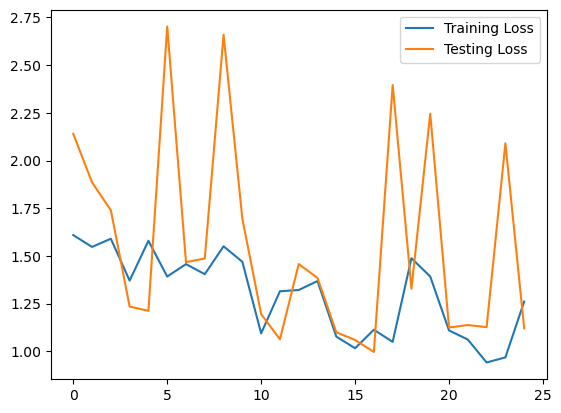

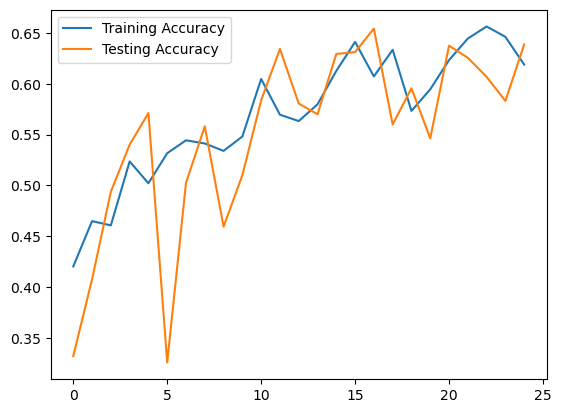

<Figure size 640x480 with 0 Axes>

In [21]:
#loss
plt.plot(a2_model.history['loss'], label='Training Loss')
plt.plot(a2_model.history['val_loss'], label='Testing Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#accuracy
plt.plot(a2_model.history['accuracy'], label='Training Accuracy')
plt.plot(a2_model.history['val_accuracy'], label='Testing Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
#saving model

from tensorflow.keras.models import load_model
model.save('a2model_resnet50.h5')

In [23]:
Y_prediction_testdata = model.predict(testing_dataset)

34/34 [==============================] - 105s 3s/step


In [24]:
Y_prediction_testdata

array([[9.82495070e-01, 6.29003113e-03, 2.97626806e-03, 8.23859684e-03],
       [3.28618437e-01, 4.44824725e-01, 2.05850393e-01, 2.07063723e-02],
       [1.00000000e+00, 5.96977573e-14, 6.21564580e-20, 4.35932179e-08],
       ...,
       [3.35642067e-03, 7.48351449e-03, 9.01423931e-01, 8.77360925e-02],
       [9.76021290e-01, 1.30435228e-05, 1.01406795e-05, 2.39555370e-02],
       [1.09870300e-01, 8.79304051e-01, 9.08685476e-03, 1.73881580e-03]],
      dtype=float32)

In [56]:
import numpy as np
Y_prediction_testdata = np.argmax(Y_prediction_testdata, axis=0)

In [57]:
Y_prediction_testdata

0

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img 

In [71]:
model = load_model('a2model_resnet50.h5')

In [72]:
img_data

array([[[[-103.178215, -116.01821 , -122.91921 ],
         [-103.18214 , -116.02213 , -122.923134],
         [-103.18606 , -116.026054, -122.927055],
         ...,
         [-103.11155 , -115.951546, -122.85255 ],
         [-103.10371 , -115.9437  , -122.8447  ],
         [-103.099785, -115.93978 , -122.84078 ]]],


       [[[-103.14292 , -115.98292 , -122.88392 ],
         [-103.14684 , -115.98684 , -122.88784 ],
         [-103.150764, -115.99076 , -122.89176 ],
         ...,
         [-103.123314, -115.96331 , -122.86431 ],
         [-103.11155 , -115.951546, -122.85255 ],
         [-103.10371 , -115.9437  , -122.8447  ]]],


       [[[-103.13116 , -115.97115 , -122.872154],
         [-103.13116 , -115.97115 , -122.872154],
         [-103.13508 , -115.975075, -122.876076],
         ...,
         [-103.150764, -115.99076 , -122.89176 ],
         [-103.14684 , -115.98684 , -122.88784 ],
         [-103.13508 , -115.975075, -122.876076]]],


       ...,


       [[[-103.24097 , -116.0613

In [73]:
img = load_img('dataset_256X256/test/berry/10_256.jpg', target_size=(256, 256))

In [74]:
image

<module 'keras.api._v2.keras.preprocessing.image' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [75]:
from tensorflow.keras.preprocessing.image import img_to_array
layer=img_to_array(img)
layer

array([[[194., 194., 194.],
        [193., 193., 193.],
        [192., 192., 192.],
        ...,
        [211., 211., 211.],
        [213., 213., 213.],
        [214., 214., 214.]],

       [[203., 203., 203.],
        [202., 202., 202.],
        [201., 201., 201.],
        ...,
        [208., 208., 208.],
        [211., 211., 211.],
        [213., 213., 213.]],

       [[206., 206., 206.],
        [206., 206., 206.],
        [205., 205., 205.],
        ...,
        [201., 201., 201.],
        [202., 202., 202.],
        [205., 205., 205.]],

       ...,

       [[182., 183., 178.],
        [181., 182., 177.],
        [182., 183., 178.],
        ...,
        [180., 181., 176.],
        [181., 181., 179.],
        [183., 183., 181.]],

       [[164., 165., 160.],
        [163., 162., 158.],
        [160., 159., 155.],
        ...,
        [181., 181., 179.],
        [176., 176., 174.],
        [176., 176., 174.]],

       [[158., 157., 153.],
        [158., 157., 153.],
        [159., 1

In [76]:
layer.shape

(256, 256, 3)

In [65]:
layer=layer/255
layer

array([[[0.7607843 , 0.7607843 , 0.7607843 ],
        [0.75686276, 0.75686276, 0.75686276],
        [0.7529412 , 0.7529412 , 0.7529412 ],
        ...,
        [0.827451  , 0.827451  , 0.827451  ],
        [0.8352941 , 0.8352941 , 0.8352941 ],
        [0.8392157 , 0.8392157 , 0.8392157 ]],

       [[0.79607844, 0.79607844, 0.79607844],
        [0.7921569 , 0.7921569 , 0.7921569 ],
        [0.7882353 , 0.7882353 , 0.7882353 ],
        ...,
        [0.8156863 , 0.8156863 , 0.8156863 ],
        [0.827451  , 0.827451  , 0.827451  ],
        [0.8352941 , 0.8352941 , 0.8352941 ]],

       [[0.80784315, 0.80784315, 0.80784315],
        [0.80784315, 0.80784315, 0.80784315],
        [0.8039216 , 0.8039216 , 0.8039216 ],
        ...,
        [0.7882353 , 0.7882353 , 0.7882353 ],
        [0.7921569 , 0.7921569 , 0.7921569 ],
        [0.8039216 , 0.8039216 , 0.8039216 ]],

       ...,

       [[0.7137255 , 0.7176471 , 0.69803923],
        [0.70980394, 0.7137255 , 0.69411767],
        [0.7137255 , 0

In [81]:
layer=np.expand_dims(layer,axis=0)
img_data=preprocess_input(layer)
img_data.shape

(1, 256, 256, 3)

In [82]:
model.predict(img_data)

1/1 [==============================] - 1s 663ms/step


array([[3.4813568e-04, 9.9965191e-01, 0.0000000e+00, 3.6820172e-10]],
      dtype=float32)

In [98]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 91ms/step


In [97]:
a==1

array([ True])

predicting it right, image is from 'berry' category......!!

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50